# HCP Tutorial
This notebook is the copy of hcp turotial colab notebook provided in neuromatch academy

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#@title Figure settings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

In [3]:
# The download cells will store the data in nested directories starting here:
HCP_DIR = "./hcp_rest/"
if not os.path.isdir(HCP_DIR):
    os.mkdir(HCP_DIR)

# The data shared for NMA projects is a subset of the full HCP dataset
N_SUBJECTS = 20

# The data have already been aggregated into ROIs from the Glasesr parcellation
N_PARCELS = 360

# The acquisition parameters for all tasks were identical
TR = 0.72  # Time resolution, in sec

# The parcels are matched across hemispheres with the same order
HEMIS = ["Right", "Left"]

# Each experiment was repeated multiple times in each subject
N_RUNS_REST = 4
N_RUNS_TASK = 2

# Time series data are organized by experiment, with each experiment
# having an LR and RL (phase-encode direction) acquistion
BOLD_NAMES = [
  "rfMRI_REST1_LR", "rfMRI_REST1_RL",
  "rfMRI_REST2_LR", "rfMRI_REST2_RL",
  "tfMRI_MOTOR_RL", "tfMRI_MOTOR_LR",
  "tfMRI_WM_RL", "tfMRI_WM_LR",
  "tfMRI_EMOTION_RL", "tfMRI_EMOTION_LR",
  "tfMRI_GAMBLING_RL", "tfMRI_GAMBLING_LR",
  "tfMRI_LANGUAGE_RL", "tfMRI_LANGUAGE_LR",
  "tfMRI_RELATIONAL_RL", "tfMRI_RELATIONAL_LR",
  "tfMRI_SOCIAL_RL", "tfMRI_SOCIAL_LR"
]

# You may want to limit the subjects used during code development.
# This will use all subjects:
subjects = range(N_SUBJECTS)

In [4]:
regions = np.load(f"{HCP_DIR}/regions.npy").T
region_info = dict(
    name=regions[0].tolist(),
    network=regions[1],
    myelin=regions[2].astype(np.float),
)


In [5]:
region_info["name"]

['R_V1',
 'R_MST',
 'R_V6',
 'R_V2',
 'R_V3',
 'R_V4',
 'R_V8',
 'R_4',
 'R_3b',
 'R_FEF',
 'R_PEF',
 'R_55b',
 'R_V3A',
 'R_RSC',
 'R_POS2',
 'R_V7',
 'R_IPS1',
 'R_FFC',
 'R_V3B',
 'R_LO1',
 'R_LO2',
 'R_PIT',
 'R_MT',
 'R_A1',
 'R_PSL',
 'R_SFL',
 'R_PCV',
 'R_STV',
 'R_7Pm',
 'R_7m',
 'R_POS1',
 'R_23d',
 'R_v23ab',
 'R_d23ab',
 'R_31pv',
 'R_5m',
 'R_5mv',
 'R_23c',
 'R_5L',
 'R_24dd',
 'R_24dv',
 'R_7AL',
 'R_SCEF',
 'R_6ma',
 'R_7Am',
 'R_7PL',
 'R_7PC',
 'R_LIPv',
 'R_VIP',
 'R_MIP',
 'R_1',
 'R_2',
 'R_3a',
 'R_6d',
 'R_6mp',
 'R_6v',
 'R_p24pr',
 'R_33pr',
 'R_a24pr',
 'R_p32pr',
 'R_a24',
 'R_d32',
 'R_8BM',
 'R_p32',
 'R_10r',
 'R_47m',
 'R_8Av',
 'R_8Ad',
 'R_9m',
 'R_8BL',
 'R_9p',
 'R_10d',
 'R_8C',
 'R_44',
 'R_45',
 'R_47l',
 'R_a47r',
 'R_6r',
 'R_IFJa',
 'R_IFJp',
 'R_IFSp',
 'R_IFSa',
 'R_p9-46v',
 'R_46',
 'R_a9-46v',
 'R_9-46d',
 'R_9a',
 'R_10v',
 'R_a10p',
 'R_10pp',
 'R_11l',
 'R_13l',
 'R_OFC',
 'R_47s',
 'R_LIPd',
 'R_6a',
 'R_i6-8',
 'R_s6-8',
 'R_43',
 'R_O

In [6]:
region_info["network"]

array(['Visual1', 'Visual2', 'Visual2', 'Visual2', 'Visual2', 'Visual2',
       'Visual2', 'Somatomotor', 'Somatomotor', 'Cingulo-Oper',
       'Language', 'Default', 'Visual2', 'Frontopariet', 'Frontopariet',
       'Visual2', 'Visual2', 'Visual2', 'Visual2', 'Visual2', 'Visual2',
       'Visual2', 'Visual2', 'Auditory', 'Default', 'Default',
       'Dorsal-atten', 'Default', 'Frontopariet', 'Posterior-Mu',
       'Posterior-Mu', 'Posterior-Mu', 'Posterior-Mu', 'Posterior-Mu',
       'Posterior-Mu', 'Somatomotor', 'Cingulo-Oper', 'Cingulo-Oper',
       'Somatomotor', 'Somatomotor', 'Somatomotor', 'Somatomotor',
       'Cingulo-Oper', 'Cingulo-Oper', 'Cingulo-Oper', 'Language',
       'Somatomotor', 'Visual2', 'Visual2', 'Language', 'Somatomotor',
       'Somatomotor', 'Somatomotor', 'Somatomotor', 'Somatomotor',
       'Somatomotor', 'Cingulo-Oper', 'Cingulo-Oper', 'Cingulo-Oper',
       'Cingulo-Oper', 'Posterior-Mu', 'Posterior-Mu', 'Frontopariet',
       'Posterior-Mu', 'Posterior-

In [7]:
count_dict = {}
for net in region_info["network"]:
    if net not in count_dict:
        count_dict[net] = 1
    else:
        count_dict[net] += 1

In [8]:
count_dict

{'Visual1': 6,
 'Visual2': 54,
 'Somatomotor': 39,
 'Cingulo-Oper': 56,
 'Language': 23,
 'Default': 23,
 'Frontopariet': 50,
 'Auditory': 15,
 'Dorsal-atten': 7,
 'Posterior-Mu': 77,
 'Orbito-Affec': 6,
 'Ventral-Mult': 4}

/anaconda3/lib/python3.6/site-packages/IPython/core/pylabtools.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


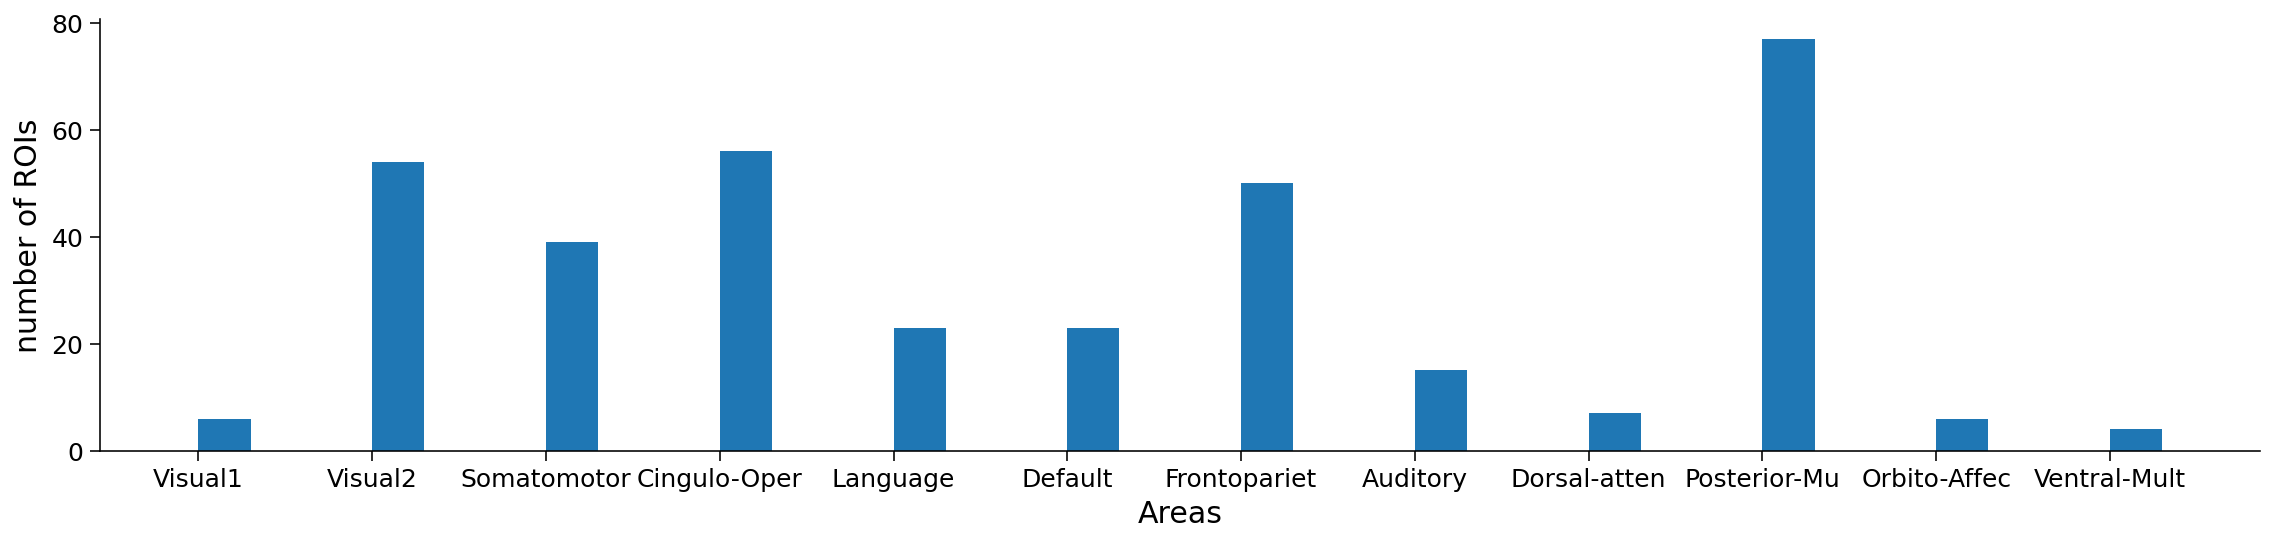

In [9]:
fig = plt.figure(figsize=(15, 3))
ax = fig.add_axes([0,0,1,1])
areas = list(count_dict.keys())
num_ROIs = list(count_dict.values()) 
ax.bar(areas,num_ROIs,align='edge', width=0.3)
plt.ylabel("number of ROIs")
plt.xlabel("Areas")
plt.show()

## Helper functions

In [10]:
def get_image_ids(name):
    """Get the 1-based image indices for runs in a given experiment.

    Args:
      name (str) : Name of experiment ("rest" or name of task) to load
    Returns:
      run_ids (list of int) : Numeric ID for experiment image files

    """
    run_ids = [
    i for i, code in enumerate(BOLD_NAMES, 1) if name.upper() in code
    ]
    if not run_ids:
        raise ValueError(f"Found no data for '{name}''")
    return run_ids

def load_timeseries(subject, name, runs=None, concat=True, remove_mean=True):
    """Load timeseries data for a single subject.

    Args:
    subject (int): 0-based subject ID to load
    name (str) : Name of experiment ("rest" or name of task) to load
    run (None or int or list of ints): 0-based run(s) of the task to load,
      or None to load all runs.
    concat (bool) : If True, concatenate multiple runs in time
    remove_mean (bool) : If True, subtract the parcel-wise mean

    Returns
    ts (n_parcel x n_tp array): Array of BOLD data values

    """
    # Get the list relative 0-based index of runs to use
    if runs is None:
        runs = range(N_RUNS_REST) if name == "rest" else range(N_RUNS_TASK)
    elif isinstance(runs, int):
        runs = [runs]

    # Get the first (1-based) run id for this experiment 
    offset = get_image_ids(name)[0]

    # Load each run's data
    bold_data = [
      load_single_timeseries(name,subject, offset + run, remove_mean) for run in runs
    ]

    # Optionally concatenate in time
    if concat:
        bold_data = np.concatenate(bold_data, axis=-1)

    return bold_data

def load_single_timeseries(name,subject, bold_run, remove_mean=True):
    """Load timeseries data for a single subject and single run.

    Args:
    subject (int): 0-based subject ID to load
    bold_run (int): 1-based run index, across all tasks
    remove_mean (bool): If True, subtract the parcel-wise mean

    Returns
    ts (n_parcel x n_timepoint array): Array of BOLD data values

    """
    if name == "rest":
        HCP_DIR = "./hcp_rest/"
    else:
        HCP_DIR = "./hcp_task/"
    bold_path = f"{HCP_DIR}/subjects/{subject}/timeseries"
    bold_file = f"bold{bold_run}_Atlas_MSMAll_Glasser360Cortical.npy"
    ts = np.load(f"{bold_path}/{bold_file}")
    if remove_mean:
        ts -= ts.mean(axis=1, keepdims=True)
    return ts

def load_evs(subject, name, condition):
    """Load EV (explanatory variable) data for one task condition.

    Args:
    subject (int): 0-based subject ID to load
    name (str) : Name of task
    condition (str) : Name of condition

    Returns
    evs (list of dicts): A dictionary with the onset, duration, and amplitude
      of the condition for each run.

    """
    evs = []
    for id in get_image_ids(name):
        task_key = BOLD_NAMES[id - 1]
        ev_file = f"{HCP_DIR}/subjects/{subject}/EVs/{task_key}/{condition}.txt"
        ev = dict(zip(["onset", "duration", "amplitude"], np.genfromtxt(ev_file).T))
        evs.append(ev)
    return evs

In [29]:
def condition_frames(run_evs, skip=0):
    """Identify timepoints corresponding to a given condition in each run.

    Args:
    run_evs (list of dicts) : Onset and duration of the event, per run
    skip (int) : Ignore this many frames at the start of each trial, to account
      for hemodynamic lag

    Returns:
    frames_list (list of 1D arrays): Flat arrays of frame indices, per run

    """
    frames_list = []
    for ev in run_evs:

        # Determine when trial starts, rounded down
        start = np.floor(ev["onset"] / TR).astype(int)

        # Use trial duration to determine how many frames to include for trial
        duration = np.ceil(ev["duration"] / TR).astype(int)

        # Take the range of frames that correspond to this specific trial
        frames = [s + np.arange(skip, d) for s, d in zip(start, duration)]

        frames_list.append(np.concatenate(frames))

    return frames_list

def selective_average(timeseries_data, ev, skip=0):
    """Take the temporal mean across frames for a given condition.

    Args:
    timeseries_data (array or list of arrays): n_parcel x n_tp arrays
    ev (dict or list of dicts): Condition timing information
    skip (int) : Ignore this many frames at the start of each trial, to account
      for hemodynamic lag

    Returns:
    avg_data (1D array): Data averagted across selected image frames based
    on condition timing

    """
    # Ensure that we have lists of the same length
    if not isinstance(timeseries_data, list):
        timeseries_data = [timeseries_data]
    if not isinstance(ev, list):
        ev = [ev]
    if len(timeseries_data) != len(ev):
        raise ValueError("Length of `timeseries_data` and `ev` must match.")

    # Identify the indices of relevant frames
    frames = condition_frames(ev)

    # Select the frames from each image
    selected_data = []
    for run_data, run_frames in zip(timeseries_data, frames):
        selected_data.append(run_data[:, run_frames])

    # Take the average in each parcel
    avg_data = np.concatenate(selected_data, axis=-1).mean(axis=-1)
    return avg_data

In [11]:
help(load_timeseries)

Help on function load_timeseries in module __main__:

load_timeseries(subject, name, runs=None, concat=True, remove_mean=True)
    Load timeseries data for a single subject.
    
    Args:
    subject (int): 0-based subject ID to load
    name (str) : Name of experiment ("rest" or name of task) to load
    run (None or int or list of ints): 0-based run(s) of the task to load,
      or None to load all runs.
    concat (bool) : If True, concatenate multiple runs in time
    remove_mean (bool) : If True, subtract the parcel-wise mean
    
    Returns
    ts (n_parcel x n_tp array): Array of BOLD data values



In [12]:
timeseries = load_timeseries(subject=0, name="rest", runs=1)
print(timeseries.shape)  # n_parcel x n_timepoint

(360, 1200)


In [13]:
def compute_fc(state, subjects):
    """
    Args:
        - state: 
    Return:
        - 
    """
    timeseries = []
    
    for subject in subjects:
        ts_concat = load_timeseries(subject, state)
        timeseries.append(ts_concat)
    N_SUBJECTS = len(timeseries)
    N_PARCELS = timeseries[0].shape[0]
    
        
    fc = np.zeros((N_SUBJECTS, N_PARCELS, N_PARCELS))
    for sub, ts in enumerate(timeseries):
        fc[sub] = np.corrcoef(ts)

    group_fc = fc.mean(axis=0)

    plt.imshow(group_fc, interpolation="none", cmap="bwr", vmin=-1, vmax=1)
    plt.colorbar()
    
    plt.title(f"FC for {state}")
    plt.show()
    
    
    return group_fc

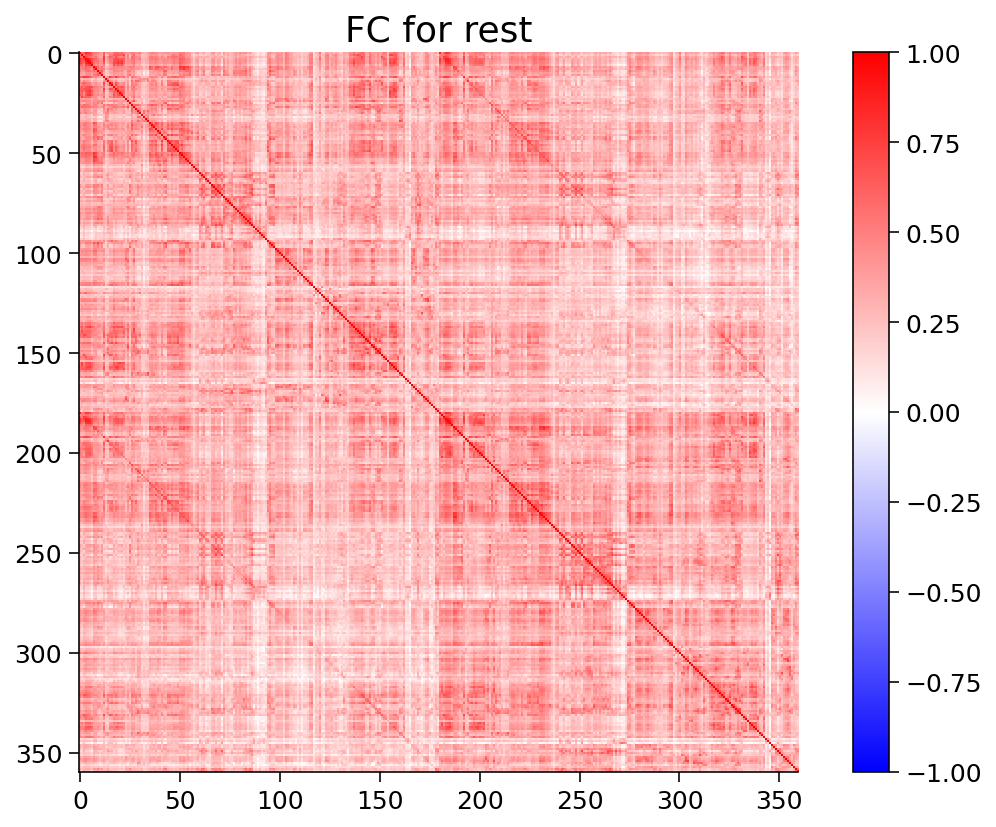

In [106]:
group_fc_rest = compute_fc("rest",subjects)

## TODO: Make functional connectivity maps for various tasks

### Social

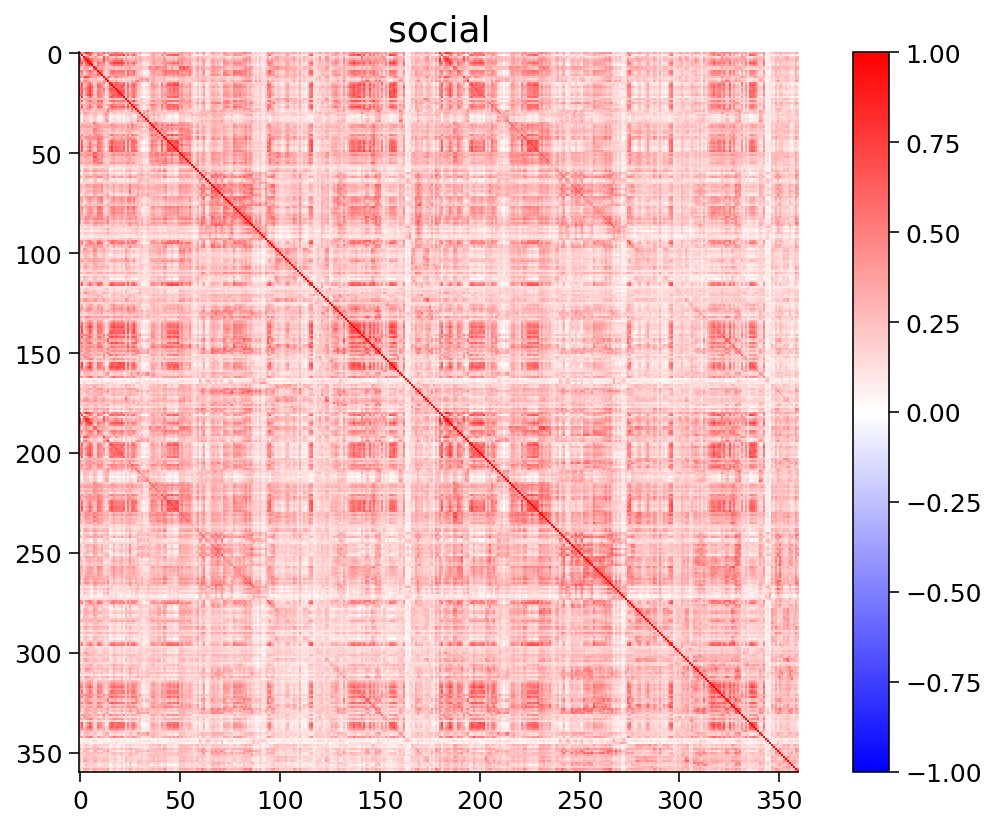

In [96]:
group_fc_social = compute_fc("social",subjects)

### Gambling

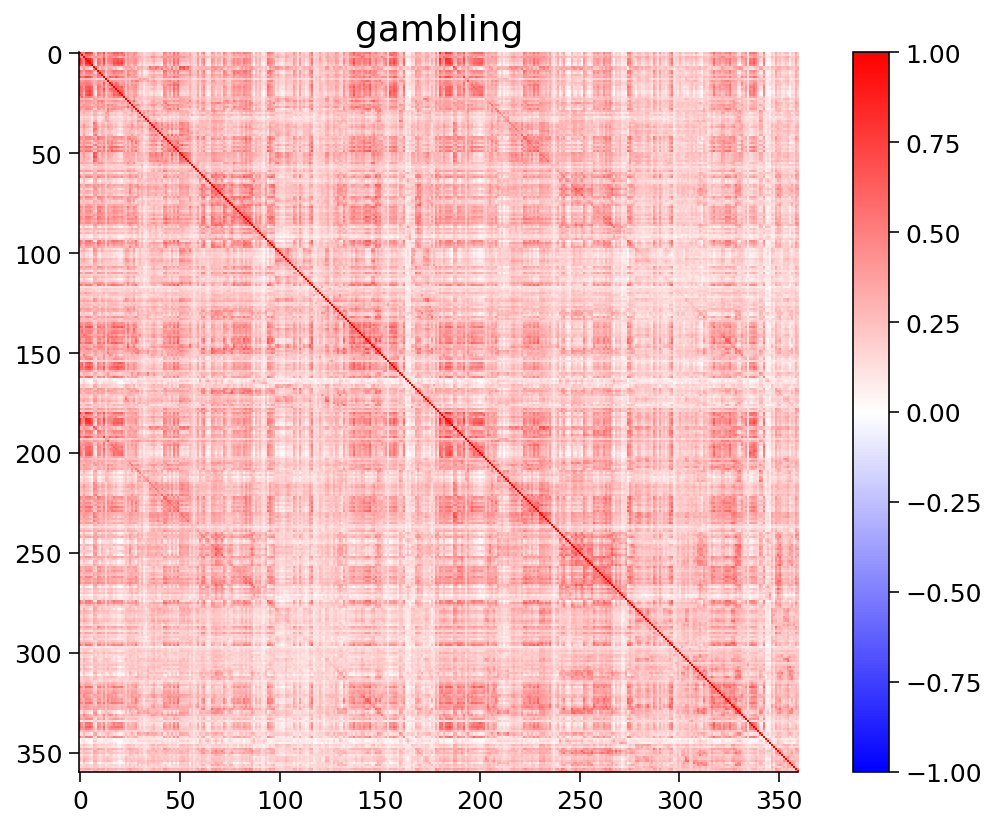

In [97]:
group_fc_gamb = compute_fc("gambling",subjects)

### Language

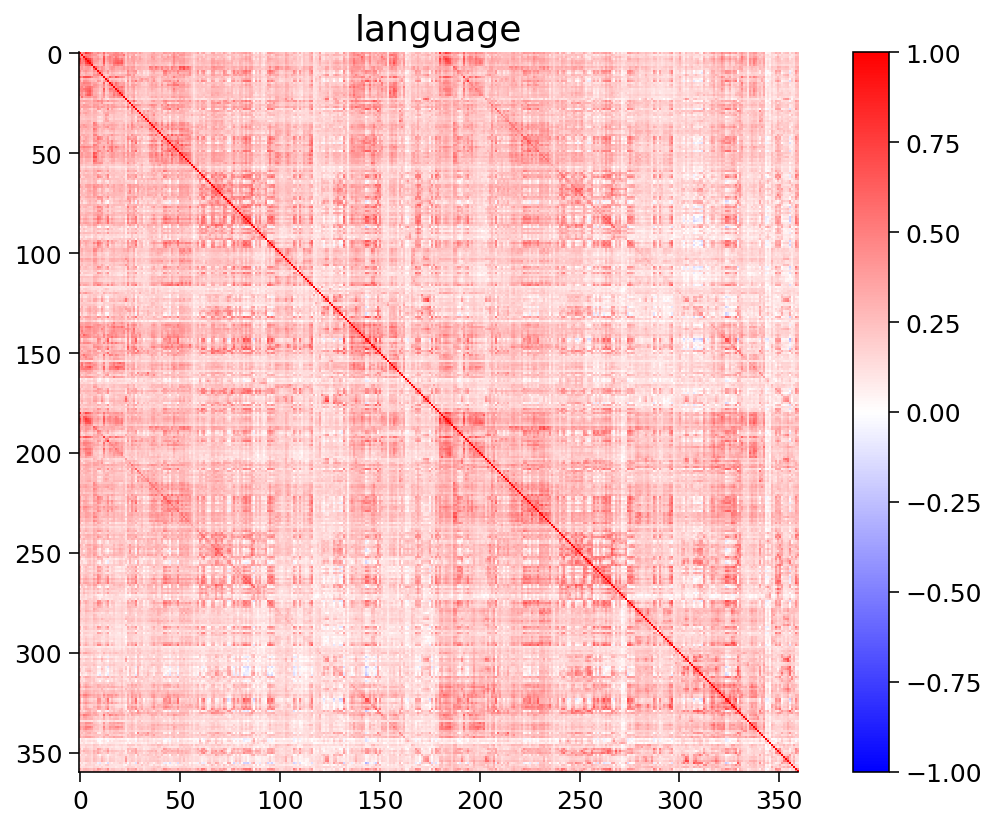

In [98]:
group_fc_lang = compute_fc("language",subjects)

### Working Memory

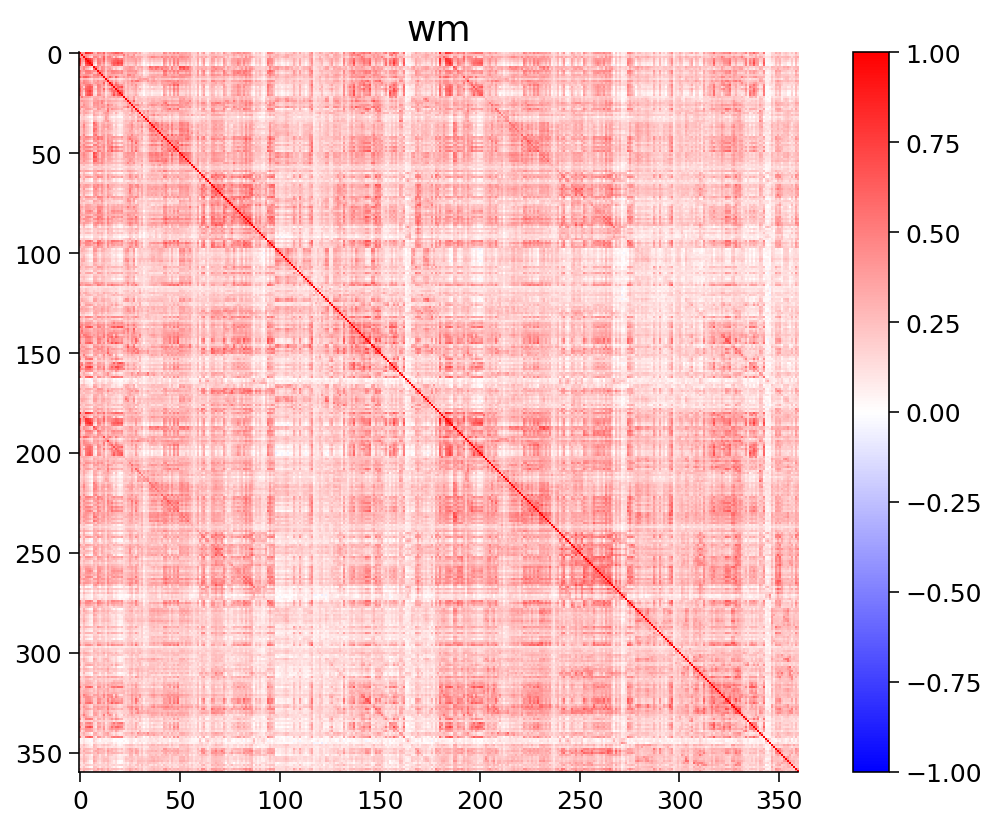

In [99]:
group_fc_wm = compute_fc("wm",subjects)

### Emotion

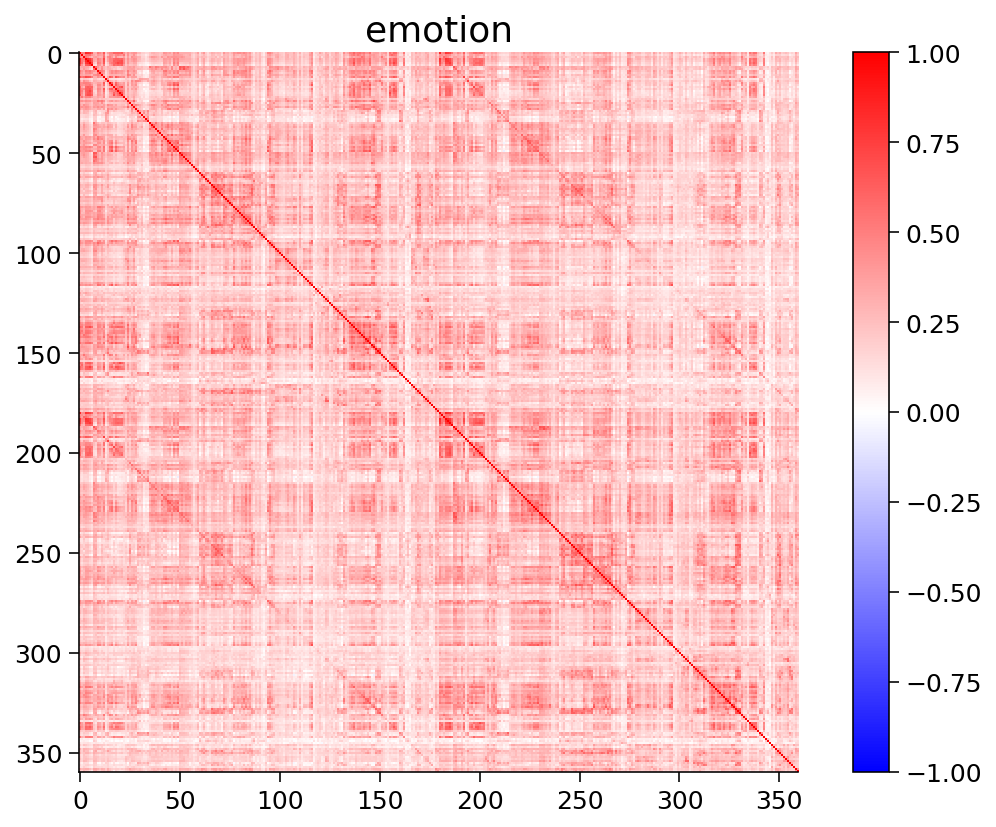

In [100]:
group_fc_em = compute_fc("emotion",subjects)

### Motor

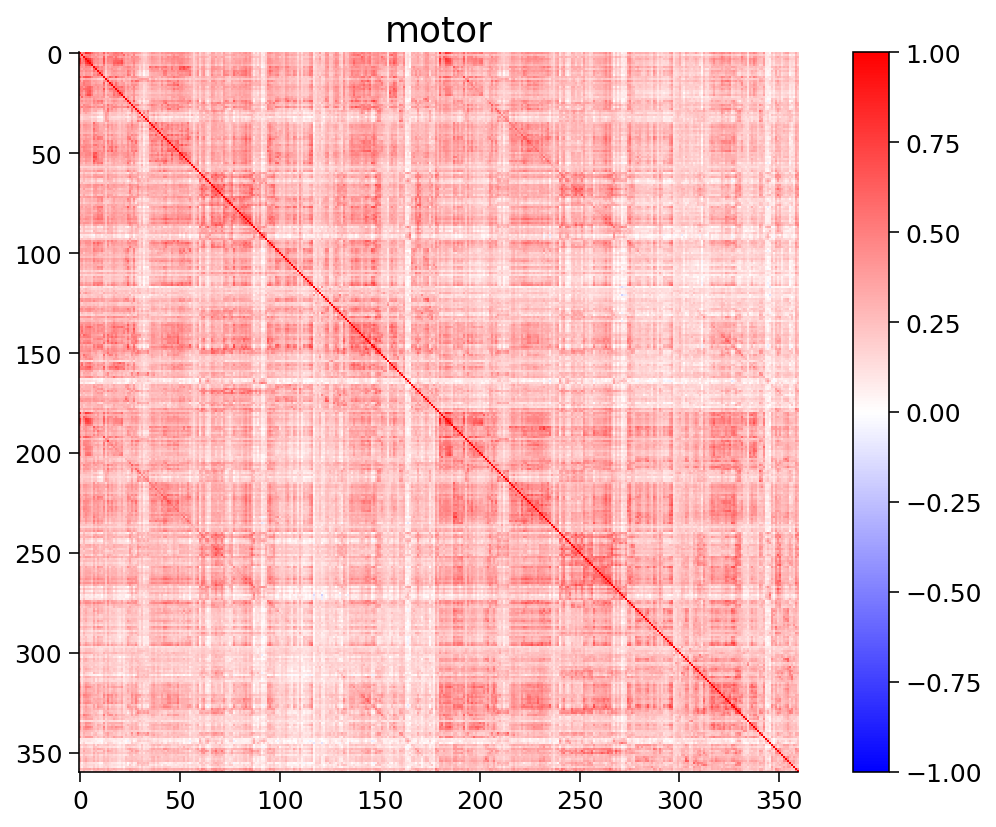

In [101]:
group_fc_motor = compute_fc("motor",subjects)

### Relational

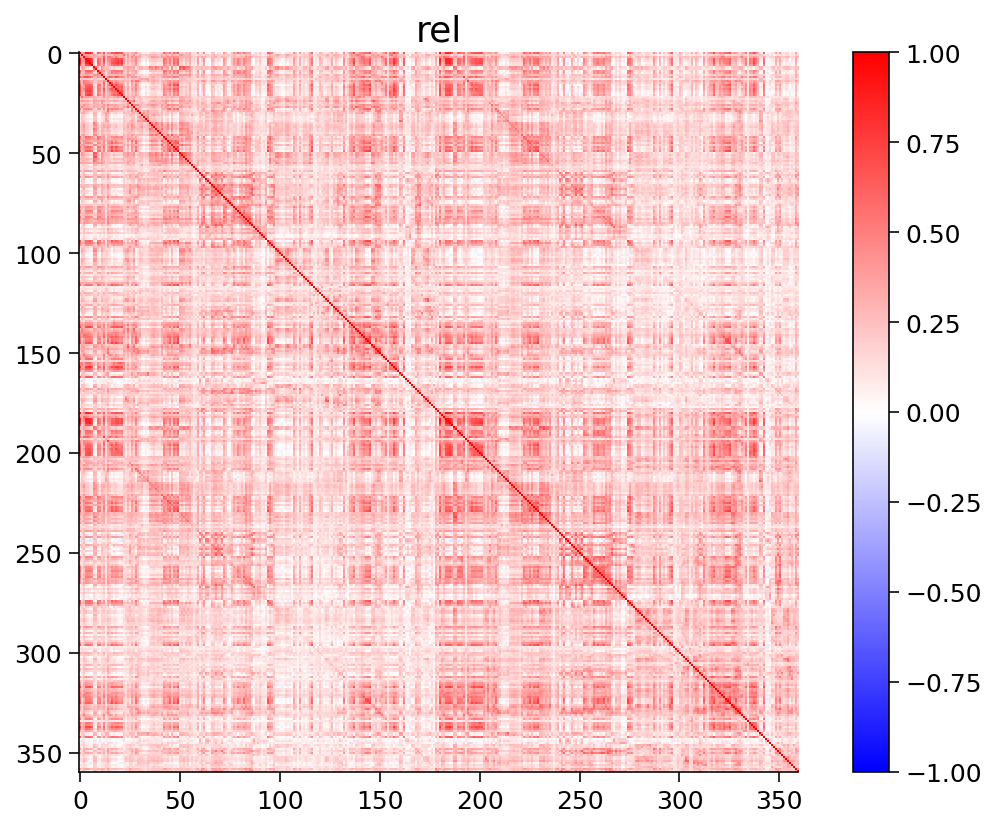

In [102]:
group_fc_rel = compute_fc("rel",subjects)

### Analysis Pipeline
- correlation matrix for tasks
- dimensionality reduction


## How does the connection strength between functional networks change?

In [108]:
region_info["network"][0]

'Visual1'

In [109]:
networks = ['Visual1','Visual2','Somatomotor', 'Cingulo-Oper','Language','Default', 'Frontopariet', 'Auditory', 'Dorsal-atten','Posterior-Mu', 'Orbito-Affec','Ventral-Mult']

In [118]:
networks_dict = {}
for i in range(len(networks)):
    networks_dict[networks[i]] = i

In [119]:
len(networks_dict)

12

In [145]:
def func_strength(group_fc,net_dict,region_info,count_dict,normalized=True):
    """
    Compute the functional connectivty 
    
    Args: 
        - group_fc (360x360): functional connectivity map
        - region_info: dictionary for info about regions
        - normalized: normalize the returning matrix if True
    Returns:
        - 
    """
    n = group_fc.shape[0] # get the number of parcels

    func_mat = np.zeros((len(net_dict),len(net_dict)))
    
    norm_mat = np.zeros((len(net_dict),len(net_dict)))
    
    
    
    for i in range(n):
        for j in range(i,n):
            ip = region_info["network"][i]
            jp = region_info["network"][j]

            func_mat[net_dict[ip],net_dict[jp]] += group_fc[i,j]
            func_mat[net_dict[jp],net_dict[ip]] += group_fc[j,i]
            
    if normalized:
        func_mat /= func_mat.sum()
        # normalize by the number of ROIs in each network
        
        
    fig, ax = plt.subplots()
    im = ax.imshow(func_mat)
    # We want to show all ticks...
    ax.set_xticks(np.arange(len(net_dict)))
    ax.set_yticks(np.arange(len(net_dict)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(list(net_dict.keys()))
    ax.set_yticklabels(list(net_dict.keys()))
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
    fig.colorbar(func_mat, ax=ax)
    ax.set_title("Connection strength betwen functional networks")
    fig.tight_layout()
    plt.show()
    
    
    return func_mat

### Resting

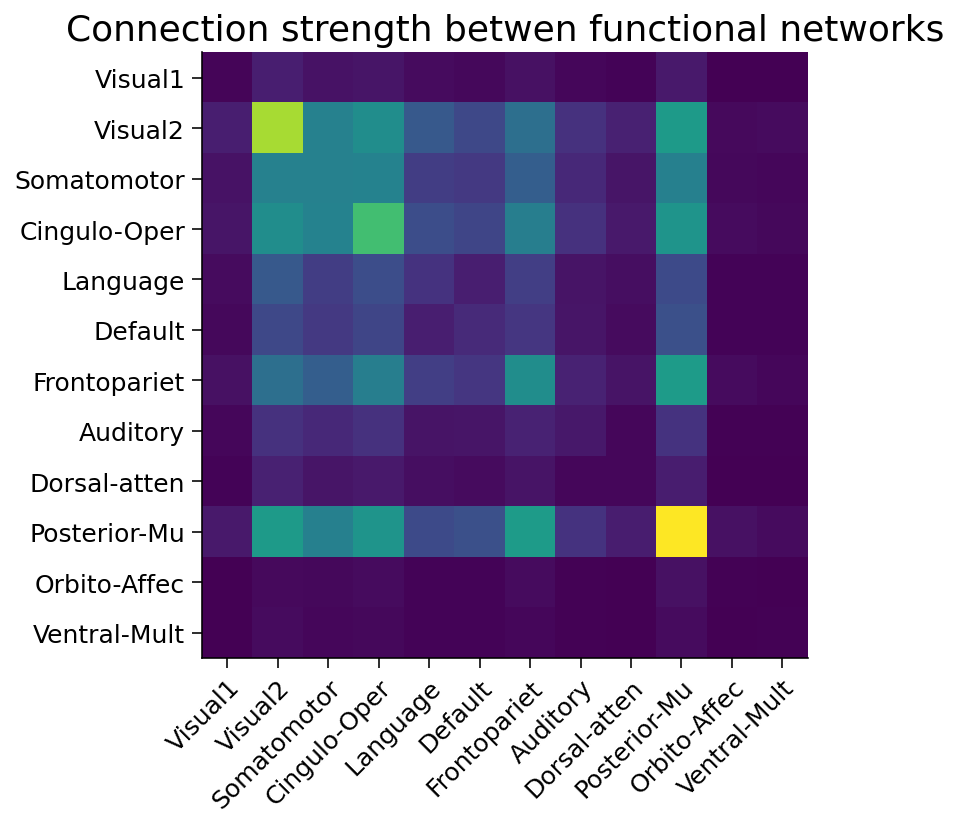

In [149]:
net_rest = func_strength(group_fc_rest,networks_dict,region_info)

### Social

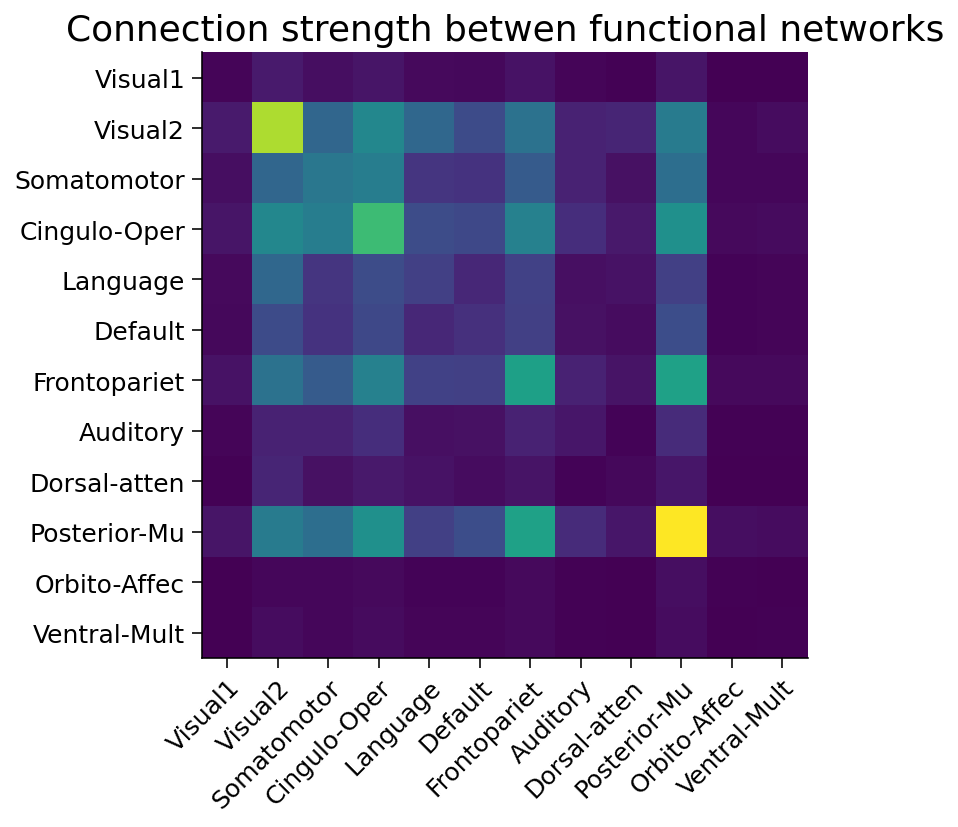

In [150]:
net_social = func_strength(group_fc_social,networks_dict,region_info)

### Gambling

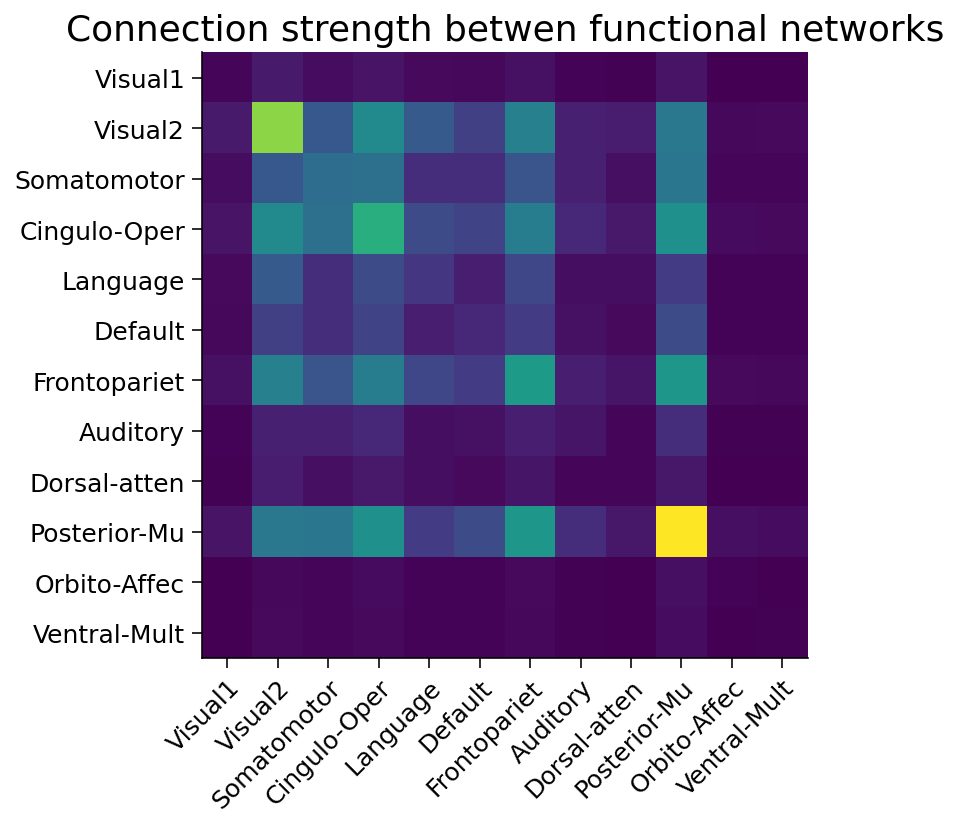

In [151]:
net_gamb = func_strength(group_fc_gamb,networks_dict,region_info)

### Language

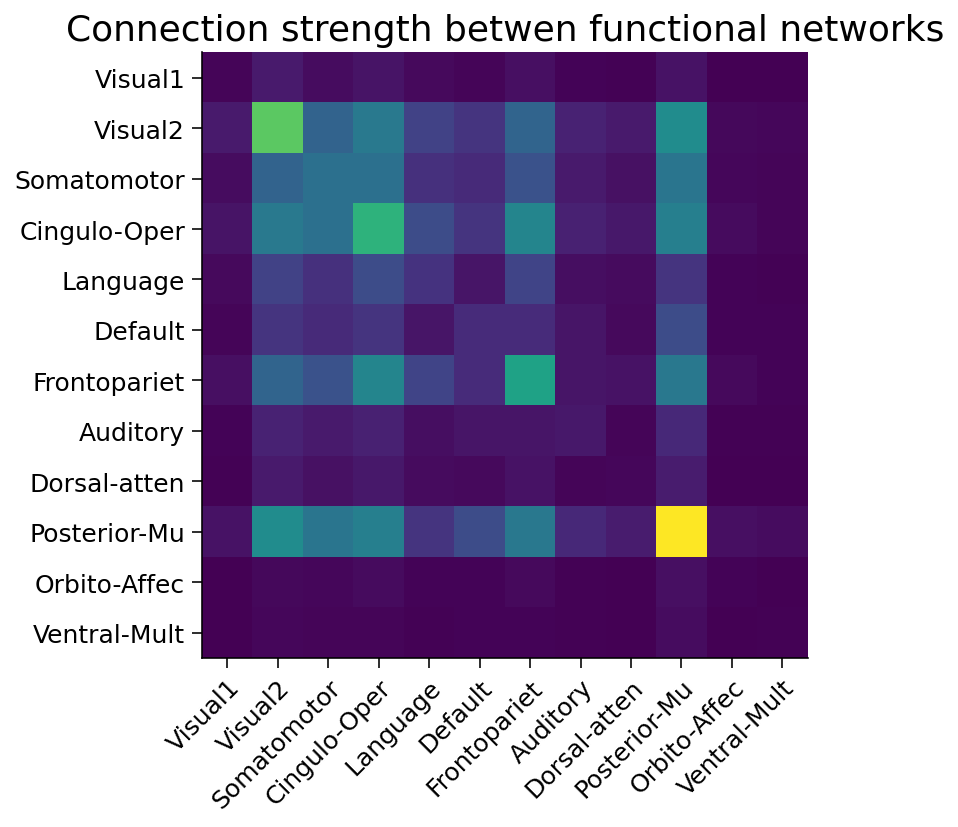

In [152]:
net_lang = func_strength(group_fc_lang,networks_dict,region_info)

### Working Memory

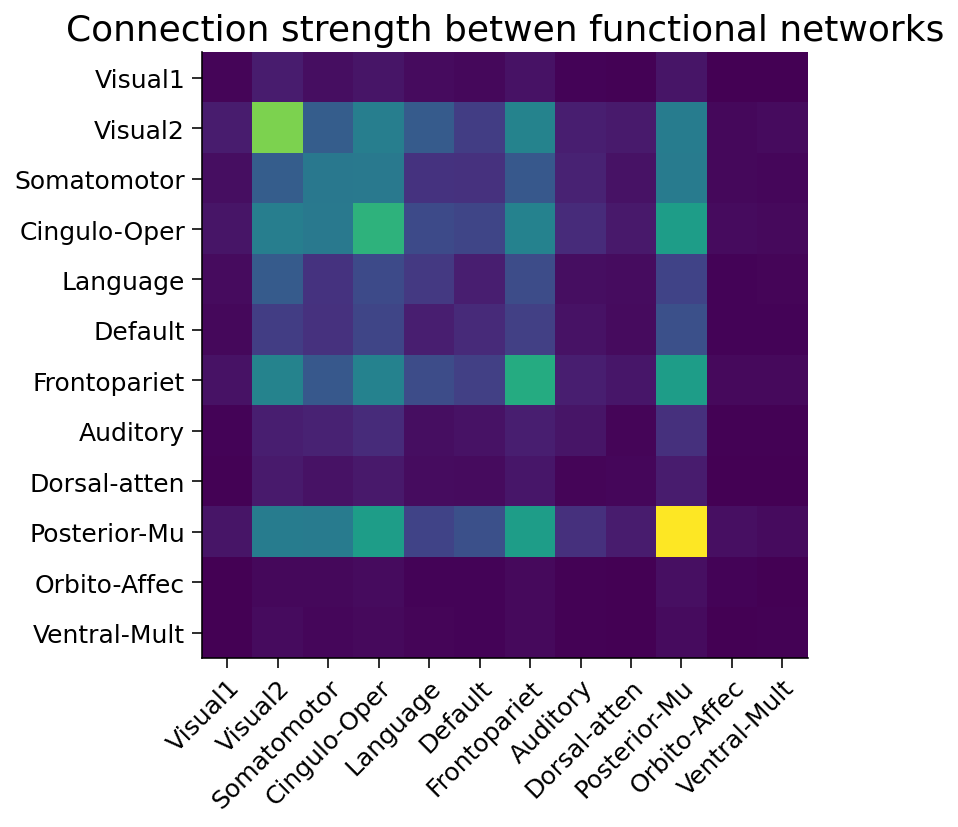

In [153]:
net_wm = func_strength(group_fc_wm,networks_dict,region_info)

### Emotion

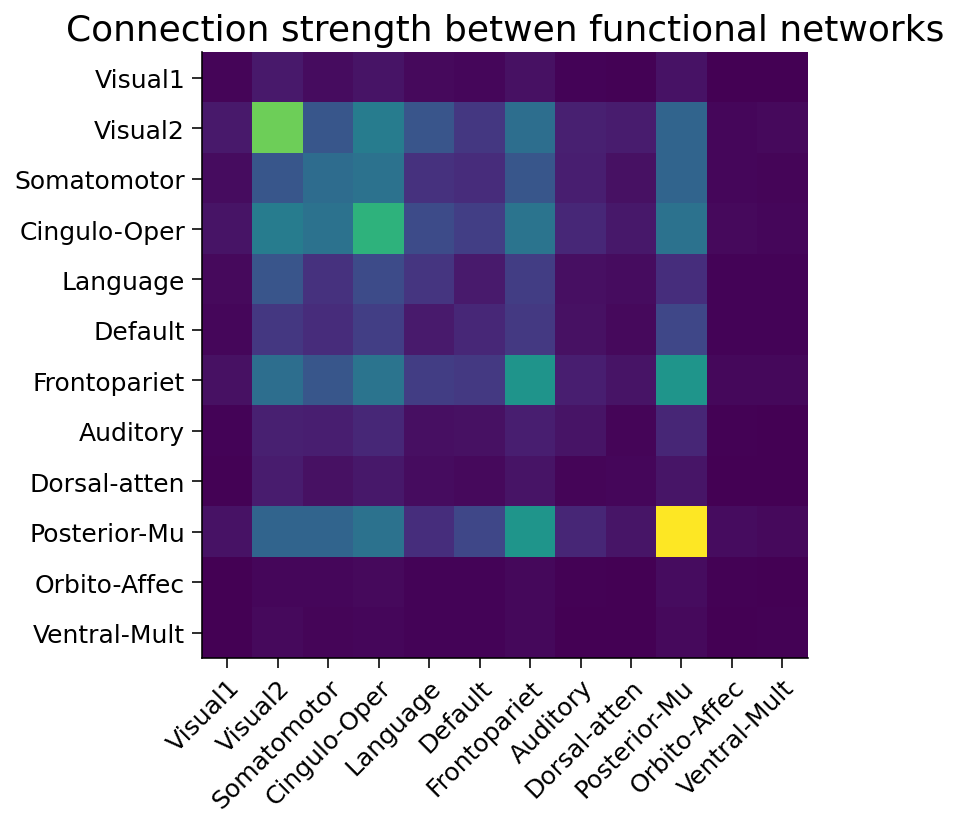

In [154]:
net_em = func_strength(group_fc_em,networks_dict,region_info)

### Motor

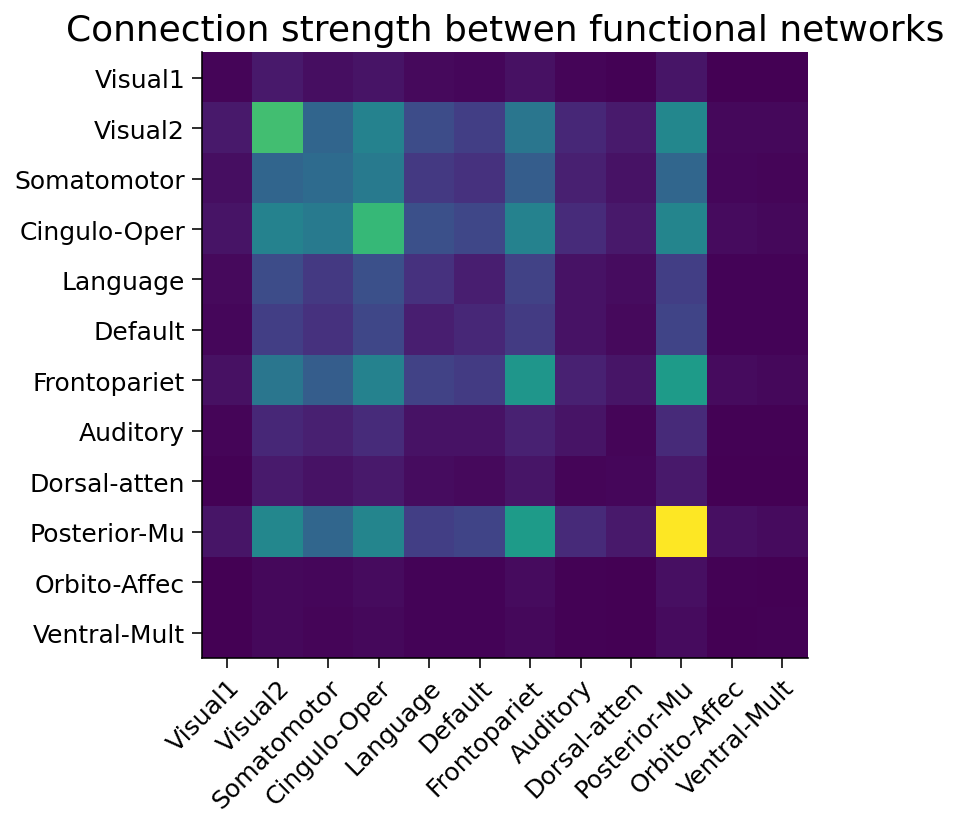

In [155]:
net_motor = func_strength(group_fc_motor,networks_dict,region_info)

### Relational

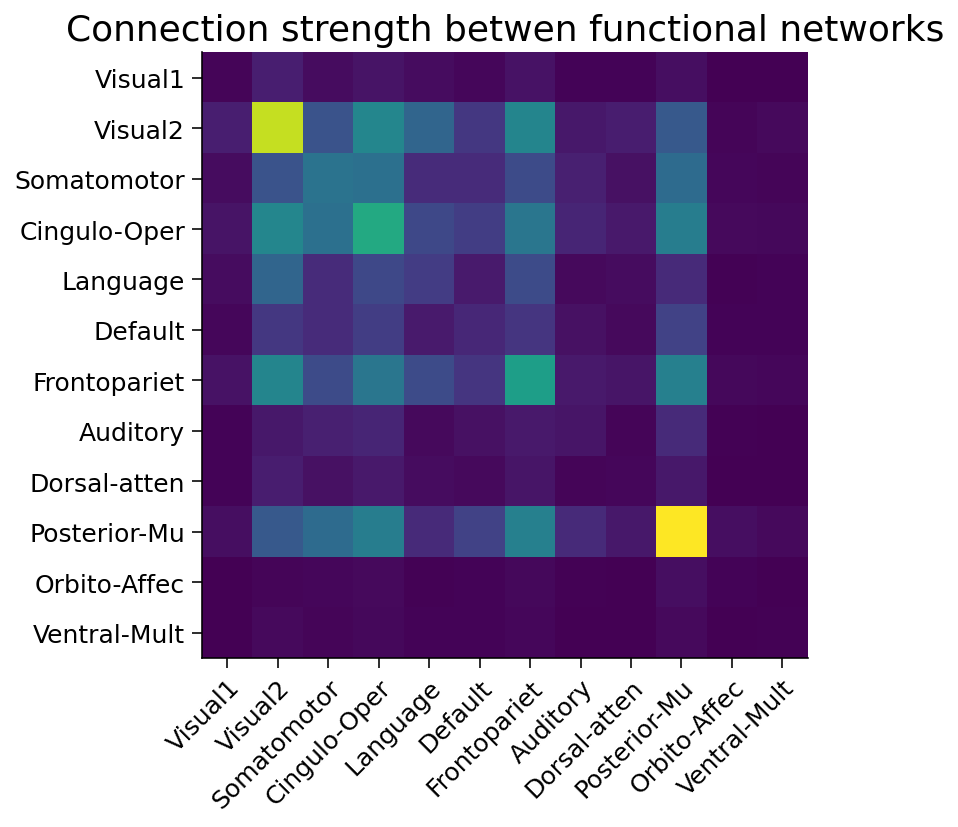

In [156]:
net_rel = func_strength(group_fc_rel,networks_dict,region_info)

In [160]:
def mat_distance(mat1,mat2,net_dict,method="subtract"):
    if method == "subtract":
        diff = mat1-mat2
    elif method == "abs":
        diff = np.abs(mat1-mat2)
    n = diff.shape[0]
    fig, ax = plt.subplots()
    im = ax.imshow(diff)
    # We want to show all ticks...
    ax.set_xticks(np.arange(n))
    ax.set_yticks(np.arange(n))
    # ... and label them with the respective list entries
    ax.set_xticklabels(list(net_dict.keys()))
    ax.set_yticklabels(list(net_dict.keys()))
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
    
    fig.colorbar(diff, ax=ax)
    ax.set_title("Difference between two matrices")
    fig.tight_layout()
    plt.show()
    
    return diff

AttributeError: 'numpy.ndarray' object has no attribute 'get_array'

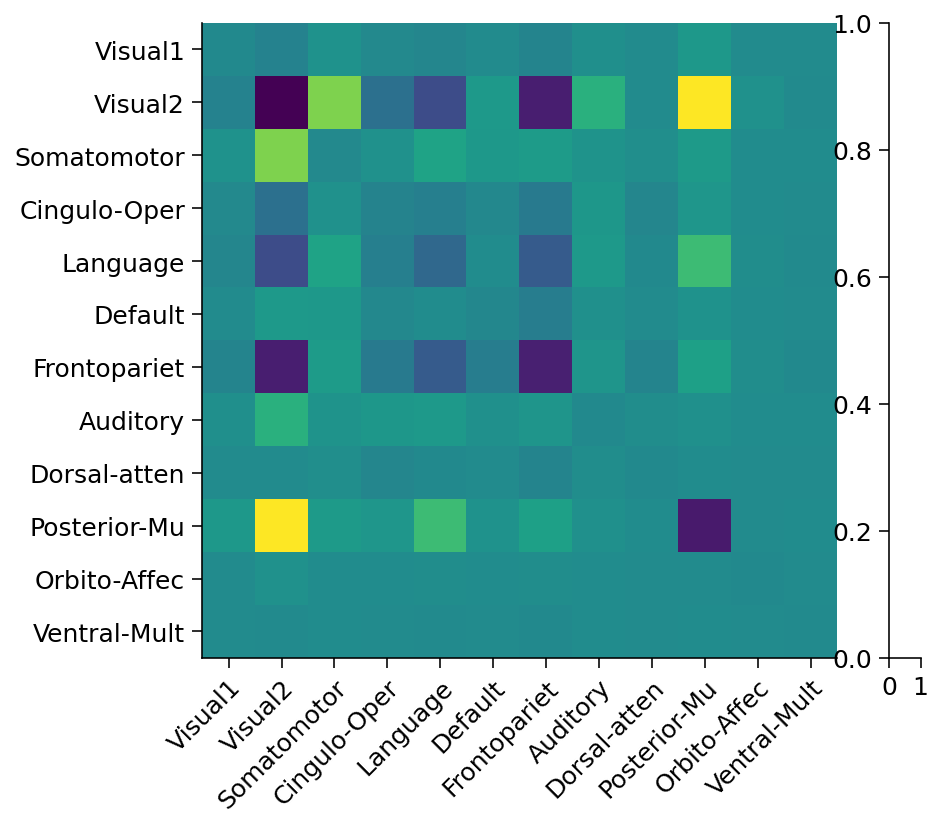

In [161]:
a = mat_distance(net_rest,net_rel,networks_dict)

## PCA on HCP

In [14]:
from sklearn.decomposition import PCA

In [33]:
time_series = load_timeseries(0,"rest")

In [43]:
pca_model = PCA(n_components=300)

In [44]:
pca_model.fit(time_series)

PCA(copy=True, iterated_power='auto', n_components=300, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [45]:
scores = pca_model.transform(time_series)

In [46]:
scores.shape

(360, 300)

In [47]:
evals = pca_model.explained_variance_

In [48]:
def get_variance_explained(evals):
    """
    Plots eigenvalues.
    Args:
    (numpy array of floats) : Vector of eigenvalues
    Returns:
    Nothing.
    """

    # cumulatively sum the eigenvalues
    csum = np.cumsum(evals)
    # normalize by the sum of eigenvalues
    variance_explained = csum / np.sum(evals)

    return variance_explained


In [49]:
var_exp = get_variance_explained(evals)

In [50]:
def plot_variance_explained(variance_explained):
    """
    Plots eigenvalues.

    Args:
    variance_explained (numpy array of floats) : Vector of variance explained
                                                 for each PC

    Returns:
    Nothing.

    """

    plt.figure()
    plt.plot(np.arange(1, len(variance_explained) + 1), variance_explained,
           '--k')
    plt.xlabel('Number of components')
    plt.ylabel('Variance explained')
    plt.show()


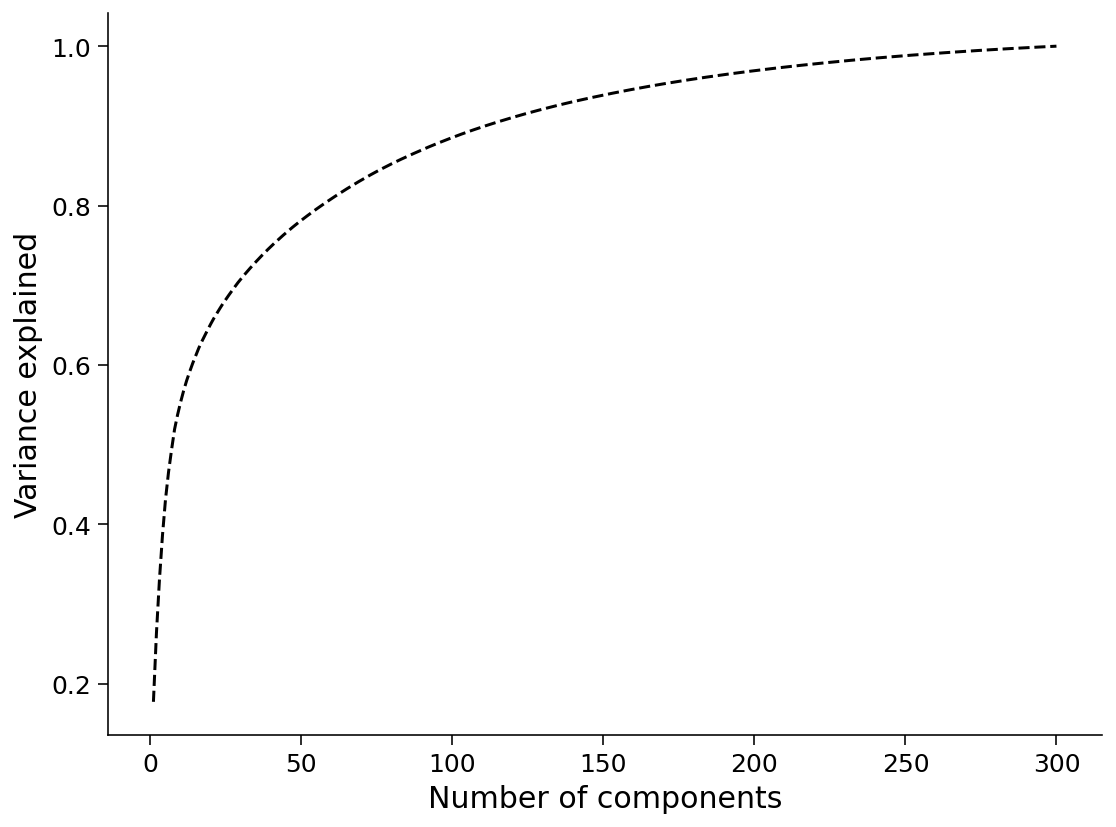

In [51]:
plot_variance_explained(var_exp)

In [56]:
def visualize_components(component1, component2, labels, show=True):
    """
    Plots a 2D representation of the data for visualization with categories
    labelled as different colors.

    Args:
    component1 (numpy array of floats) : Vector of component 1 scores
    component2 (numpy array of floats) : Vector of component 2 scores
    labels (numpy array of floats)     : Vector corresponding to categories of
                                         samples

    Returns:
    Nothing.

    """

    plt.figure()
    cmap = plt.cm.get_cmap('tab10')
    if labels != None:
        plt.scatter(x=component1, y=component2, c=labels, cmap=cmap)
    else:
         plt.scatter(x=component1, y=component2, cmap=cmap)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar(ticks=range(10))
    plt.clim(-0.5, 9.5)
    if show:
        plt.show()

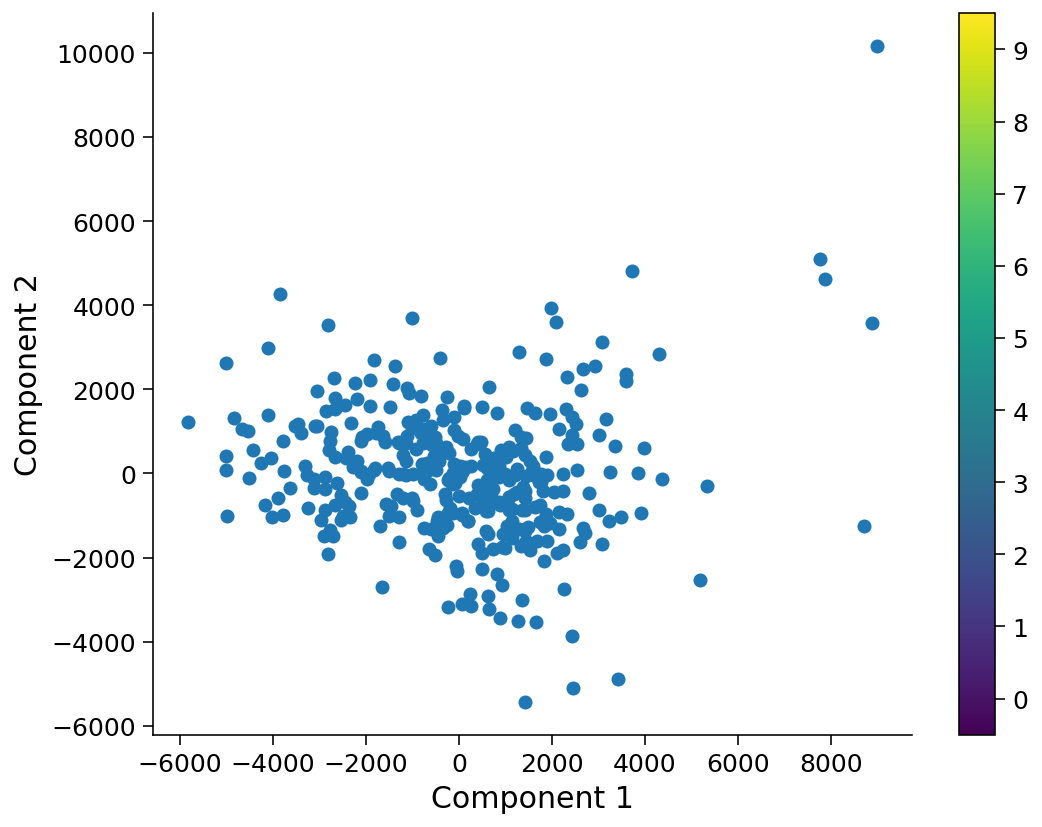

In [63]:
visualize_components(scores[:,0],scores[:,1],None)

- labeling
- a function that takes the 